<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/Bi_LSTM%26GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

df1 = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-27-bed78225ebf4>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df1 = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [30]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [31]:

X = df1['text']
y = df1['label']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state=42)

In [33]:
vocab_size = 20000
oov_token = ""
max_length = 100
padding_type = "post"
trunction_type="post"

In [34]:

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [35]:
word_index = tokenizer.word_index

In [36]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunction_type)

In [38]:
X_train_padded.shape

(1600, 100)

In [39]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunction_type)


In [40]:
X_test_padded.shape

(400, 100)

In [41]:
embeddings_index = {}
f = open('/content/drive/My Drive//glove.twitter.27B.100d.txt', encoding="utf8")
for line in f:
         values = line.split()
         word = values[0]
         coefs = np.asarray(values[1:], dtype='float32')
         embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [42]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [43]:
embedding_matrix.shape

(4499, 100)

In [44]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [47]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=0,
    min_delta=0.001,
    mode='max'
)


model = Sequential()
embedding_dim = 32
model = Sequential([
    embedding_layer,
  Bidirectional(LSTM(embedding_dim, input_length = max_length, return_sequences=True)),
    Dense(20,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='relu'),
    Dropout(0.5),
  Dense(1,activation='sigmoid')
])

In [48]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)



print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          449900    
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 64)           34048     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 100, 20)           1300      
                                                                 
 dropout_6 (Dropout)         (None, 100, 20)           0         
                                                                 
 dense_9 (Dense)             (None, 100, 6)            126       
                                                                 
 dropout_7 (Dropout)         (None, 100, 6)            0         
                                                      

In [49]:
history = model.fit(X_train_padded, y_train, epochs=10, shuffle = True, batch_size=64, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

Epoch 1/10
25/25 [==============================] - 7s 122ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6921 - val_accuracy: 0.5200
Epoch 2/10
25/25 [==============================] - 4s 161ms/step - loss: 0.6901 - accuracy: 0.5217 - val_loss: 0.6807 - val_accuracy: 0.5703
Epoch 3/10
25/25 [==============================] - 3s 103ms/step - loss: 0.6626 - accuracy: 0.6021 - val_loss: 0.6064 - val_accuracy: 0.8165
Epoch 4/10
25/25 [==============================] - 2s 86ms/step - loss: 0.6370 - accuracy: 0.6524 - val_loss: 0.5851 - val_accuracy: 0.8250
Epoch 5/10
25/25 [==============================] - 2s 81ms/step - loss: 0.6165 - accuracy: 0.6742 - val_loss: 0.5419 - val_accuracy: 0.8662
Epoch 6/10
25/25 [==============================] - 2s 82ms/step - loss: 0.5803 - accuracy: 0.7076 - val_loss: 0.4774 - val_accuracy: 0.8778
Epoch 7/10
25/25 [==============================] - 2s 86ms/step - loss: 0.5647 - accuracy: 0.7286 - val_loss: 0.4645 - val_accuracy: 0.8739


In [50]:

model.evaluate(X_test_padded, y_test)

13/13 [==============================] - 0s 20ms/step - loss: 0.4645 - accuracy: 0.8739


[0.46450069546699524, 0.8738999962806702]

In [51]:
model.evaluate(X_train_padded, y_train)

50/50 [==============================] - 2s 36ms/step - loss: 0.4426 - accuracy: 0.8976


[0.4426482915878296, 0.8976437449455261]

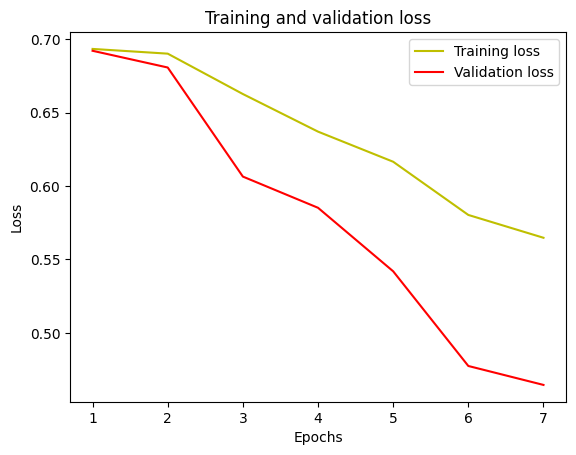

In [52]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

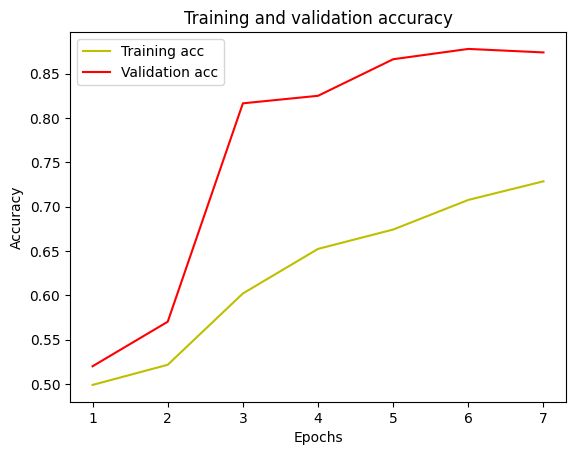

In [53]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()